# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [79]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mdetw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [80]:
# Read your api key environment variable
load_dotenv("alpaca_keys.env")
api_key = os.getenv("NEWSAPI_KEY")
type(api_key)

str

In [81]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [82]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin", language="en")
btc_news["totalResults"]

7241

In [83]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum", language="en")
eth_news["totalResults"]

3067

In [84]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(btc_news["articles"])
btc_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Indian PM Modi's Twitter hacked with bitcoin t...,The Indian prime minister's account had a mess...,https://www.bbc.co.uk/news/world-asia-india-59...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-12-12T10:59:57Z,"Image source, AFP via Getty Images\r\nImage ca..."
1,"{'id': None, 'name': 'New York Times'}",Corey Kilgannon,Why New York State Is Experiencing a Bitcoin Boom,Cryptocurrency miners are flocking to New York...,https://www.nytimes.com/2021/12/05/nyregion/bi...,https://static01.nyt.com/images/2021/11/25/nyr...,2021-12-06T00:42:28Z,The plant opening northeast of Niagara Falls t...
2,"{'id': 'engadget', 'name': 'Engadget'}",Steve Dent,Nothing's 'Black Edition' brings a modern touc...,"Earlier this year, Nothing released a pair of ...",https://www.engadget.com/nothing-unveils-a-bla...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-12-01T14:45:18Z,"Earlier this year, Nothing released a pair of ..."
3,"{'id': 'reuters', 'name': 'Reuters'}",None,Explainer: What we know so far about El Salvad...,El Salvador plans to build the world's first <...,https://www.reuters.com/markets/us/what-we-kno...,https://www.reuters.com/pf/resources/images/re...,2021-11-22T23:35:00Z,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -..."
4,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,Someone 'briefly compromised' the Indian Prime...,People aren't done hijacking major politicians...,https://www.engadget.com/india-prime-minister-...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-12-12T20:59:39Z,People aren't done hijacking major politicians...


In [85]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(eth_news["articles"])
eth_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Jacob Kastrenakes,Almost buying a copy of the Constitution is ea...,ConstitutionDAO has refunded more than half of...,https://www.theverge.com/2021/11/24/22800995/c...,https://cdn.vox-cdn.com/thumbor/saEc_B14EZIKIV...,2021-11-24T23:00:34Z,More than $1.2 million has already been spent ...
1,"{'id': None, 'name': 'Due.com'}",John Rampton,What’s Ethereum and Is It Worth the Investment?,Ethereum has been on a tear this year. It’s ou...,https://due.com/blog/whats-ethereum-and-is-it-...,https://assets.entrepreneur.com/providers/due/...,2021-11-23T14:00:09Z,Ethereum has been on a tear this year. Its out...
2,"{'id': 'wired', 'name': 'Wired'}","Dan Goodin, Ars Technica",A Software Bug Let Hackers Drain $31M From a C...,An attacker exploited a vulnerability in MonoX...,https://www.wired.com/story/hackers-drain-31-m...,https://media.wired.com/photos/61a8e032b7391d8...,2021-12-02T23:45:00Z,Blockchain startup MonoX Finance said on Wedne...
3,"{'id': None, 'name': 'Entrepreneur'}",Amanda Breen,Budweiser's First NFT Collection Sells Out Wit...,Buyers of legal drinking age could purchase th...,https://www.entrepreneur.com/article/399815,https://assets.entrepreneur.com/content/3x2/20...,2021-11-30T15:45:00Z,"On Monday, Budweiser joined the non-fungible t..."
4,"{'id': 'engadget', 'name': 'Engadget'}",Steve Dent,Nothing's 'Black Edition' brings a modern touc...,"Earlier this year, Nothing released a pair of ...",https://www.engadget.com/nothing-unveils-a-bla...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-12-01T14:45:18Z,"Earlier this year, Nothing released a pair of ..."


In [86]:
# Define function to find sentiment
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [87]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

In [88]:
for index, row in btc_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["content"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

In [89]:
btc_title_sentiment_df = pd.DataFrame(title_sent)
btc_text_sentiment_df = pd.DataFrame(text_sent)
btc_en_df = btc_df.join(btc_title_sentiment_df).join(btc_text_sentiment_df)
btc_en_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Indian PM Modi's Twitter hacked with bitcoin t...,The Indian prime minister's account had a mess...,https://www.bbc.co.uk/news/world-asia-india-59...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-12-12T10:59:57Z,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.0,0.722,0.278,-1,-0.4019,0.000,0.922,0.078,-1
1,"{'id': None, 'name': 'New York Times'}",Corey Kilgannon,Why New York State Is Experiencing a Bitcoin Boom,Cryptocurrency miners are flocking to New York...,https://www.nytimes.com/2021/12/05/nyregion/bi...,https://static01.nyt.com/images/2021/11/25/nyr...,2021-12-06T00:42:28Z,The plant opening northeast of Niagara Falls t...,0.0000,0.0,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
2,"{'id': 'engadget', 'name': 'Engadget'}",Steve Dent,Nothing's 'Black Edition' brings a modern touc...,"Earlier this year, Nothing released a pair of ...",https://www.engadget.com/nothing-unveils-a-bla...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-12-01T14:45:18Z,"Earlier this year, Nothing released a pair of ...",-0.1027,0.0,0.877,0.123,-1,0.5106,0.099,0.901,0.000,1
3,"{'id': 'reuters', 'name': 'Reuters'}",None,Explainer: What we know so far about El Salvad...,El Salvador plans to build the world's first <...,https://www.reuters.com/markets/us/what-we-kno...,https://www.reuters.com/pf/resources/images/re...,2021-11-22T23:35:00Z,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",0.0000,0.0,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
4,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,Someone 'briefly compromised' the Indian Prime...,People aren't done hijacking major politicians...,https://www.engadget.com/india-prime-minister-...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-12-12T20:59:39Z,People aren't done hijacking major politicians...,0.0000,0.0,1.000,0.000,0,0.5267,0.112,0.888,0.000,1


In [90]:
# Describe the Bitcoin Sentiment
btc_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,-0.050760,0.0,0.969150,0.030850,-0.150000,0.069290,0.044100,0.931450,0.024400,0.15000
std,0.141654,0.0,0.079483,0.079483,0.366348,0.308468,0.061293,0.070394,0.034561,0.74516
min,-0.510600,0.0,0.722000,0.000000,-1.000000,-0.401900,0.000000,0.791000,0.000000,-1.00000
25%,0.000000,0.0,1.000000,0.000000,0.000000,-0.006450,0.000000,0.891000,0.000000,0.00000
50%,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.930500,0.000000,0.00000
75%,0.000000,0.0,1.000000,0.000000,0.000000,0.302200,0.102250,1.000000,0.062000,1.00000
max,0.000000,0.0,1.000000,0.278000,0.000000,0.526700,0.158000,1.000000,0.080000,1.00000


In [91]:
# Describe the Ethereum Sentiment
eth_title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
eth_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

for index, row in eth_df.iterrows():
    try:
        # Sentiment scoring with VADER
        eth_title_sentiment = analyzer.polarity_scores(row["title"])
        eth_title_sent["title_compound"].append(eth_title_sentiment["compound"])
        eth_title_sent["title_pos"].append(eth_title_sentiment["pos"])
        eth_title_sent["title_neu"].append(eth_title_sentiment["neu"])
        eth_title_sent["title_neg"].append(eth_title_sentiment["neg"])
        eth_title_sent["title_sent"].append(get_sentiment(eth_title_sentiment["compound"]))

        eth_text_sentiment = analyzer.polarity_scores(row["content"])
        eth_text_sent["text_compound"].append(eth_text_sentiment["compound"])
        eth_text_sent["text_pos"].append(eth_text_sentiment["pos"])
        eth_text_sent["text_neu"].append(eth_text_sentiment["neu"])
        eth_text_sent["text_neg"].append(eth_text_sentiment["neg"])
        eth_text_sent["text_sent"].append(get_sentiment(eth_text_sentiment["compound"]))
    except AttributeError:
        pass

In [92]:
eth_title_sentiment_df = pd.DataFrame(eth_title_sent)
eth_text_sentiment_df = pd.DataFrame(eth_text_sent)
eth_en_df = eth_df.join(eth_title_sentiment_df).join(eth_text_sentiment_df)
eth_en_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,"{'id': 'the-verge', 'name': 'The Verge'}",Jacob Kastrenakes,Almost buying a copy of the Constitution is ea...,ConstitutionDAO has refunded more than half of...,https://www.theverge.com/2021/11/24/22800995/c...,https://cdn.vox-cdn.com/thumbor/saEc_B14EZIKIV...,2021-11-24T23:00:34Z,More than $1.2 million has already been spent ...,0.5346,0.271,0.643,0.086,1,0.0000,0.000,1.000,0.000,0
1,"{'id': None, 'name': 'Due.com'}",John Rampton,What’s Ethereum and Is It Worth the Investment?,Ethereum has been on a tear this year. It’s ou...,https://due.com/blog/whats-ethereum-and-is-it-...,https://assets.entrepreneur.com/providers/due/...,2021-11-23T14:00:09Z,Ethereum has been on a tear this year. Its out...,0.2263,0.213,0.787,0.000,1,0.6542,0.178,0.822,0.000,1
2,"{'id': 'wired', 'name': 'Wired'}","Dan Goodin, Ars Technica",A Software Bug Let Hackers Drain $31M From a C...,An attacker exploited a vulnerability in MonoX...,https://www.wired.com/story/hackers-drain-31-m...,https://media.wired.com/photos/61a8e032b7391d8...,2021-12-02T23:45:00Z,Blockchain startup MonoX Finance said on Wedne...,0.0000,0.000,1.000,0.000,0,-0.0516,0.074,0.847,0.079,-1
3,"{'id': None, 'name': 'Entrepreneur'}",Amanda Breen,Budweiser's First NFT Collection Sells Out Wit...,Buyers of legal drinking age could purchase th...,https://www.entrepreneur.com/article/399815,https://assets.entrepreneur.com/content/3x2/20...,2021-11-30T15:45:00Z,"On Monday, Budweiser joined the non-fungible t...",0.0000,0.000,1.000,0.000,0,-0.1531,0.000,0.955,0.045,-1
4,"{'id': 'engadget', 'name': 'Engadget'}",Steve Dent,Nothing's 'Black Edition' brings a modern touc...,"Earlier this year, Nothing released a pair of ...",https://www.engadget.com/nothing-unveils-a-bla...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-12-01T14:45:18Z,"Earlier this year, Nothing released a pair of ...",-0.1027,0.000,0.877,0.123,-1,0.5106,0.099,0.901,0.000,1


In [93]:
eth_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.105405,0.089150,0.875350,0.035500,0.200000,0.170450,0.060950,0.913550,0.025450,0.400000
std,0.242050,0.140082,0.172155,0.069323,0.695852,0.293212,0.055076,0.075034,0.041952,0.753937
min,-0.318200,0.000000,0.342000,0.000000,-1.000000,-0.584900,0.000000,0.729000,0.000000,-1.000000
25%,0.000000,0.000000,0.802750,0.000000,0.000000,0.000000,0.000000,0.872500,0.000000,0.000000
50%,0.000000,0.000000,0.957000,0.000000,0.000000,0.176350,0.072000,0.923500,0.000000,1.000000
75%,0.226300,0.189000,1.000000,0.021500,1.000000,0.386825,0.084750,0.967750,0.052500,1.000000
max,0.599400,0.466000,1.000000,0.223000,1.000000,0.654200,0.178000,1.000000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [94]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [95]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [96]:
btc_df.dtypes

source         object
author         object
title          object
description    object
url            object
urlToImage     object
publishedAt    object
content        object
dtype: object

In [97]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)    
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = {lemmatizer.lemmatize(word) for word in words} 
   
    # Convert the words to lowercase and remove stopwords
    output = [word.lower() for word in lem if word.lower() not in sw]
          
    return output

In [98]:
# Create a new tokens column for Bitcoin
btc_text = btc_df["content"]
btc_text = str(btc_text)
btc_news_text = tokenizer(btc_text)
btc_news_text

['getty',
 'monday',
 'major',
 'disclosure',
 'nothing',
 'virtual',
 'people',
 'nov',
 'reuters',
 'released',
 'one',
 'salvadorlondon',
 'reboun',
 'plunged',
 'process',
 'available',
 'imagesrnimage',
 'northeast',
 'competitively',
 'mizata',
 'falls',
 'dec',
 'almost',
 'surprise',
 'cryptocurrency',
 'tumbled',
 'build',
 'bitcoin',
 'pair',
 'claim',
 'arent',
 'hijacking',
 'rnel',
 'salvador',
 'ha',
 'mining',
 'computer',
 'name',
 'source',
 'image',
 'se',
 'dtype',
 'value',
 'posted',
 'worl',
 'representation',
 'dropped',
 'cryptocurrencies',
 'object',
 'done',
 'earlier',
 'representation',
 'rna',
 'via',
 'ca',
 'opening',
 'shed',
 'bitcoin',
 'december',
 'plan',
 'content',
 'year',
 'politician',
 'price',
 'el',
 'claime',
 'sta',
 'plant',
 'rnbitcoin',
 'fifth',
 'scientist',
 'niagara',
 'afp']

In [99]:
type(btc_df)

pandas.core.frame.DataFrame

In [100]:
# Create a new tokens column for Ethereum
eth_text =eth_df["content"]
eth_text = str(eth_text)
eth_news_text = tokenizer(eth_text)
eth_news_text

['castle',
 'p',
 'monday',
 'bitcoins',
 'de',
 'nothing',
 'virtual',
 'joined',
 'company',
 'released',
 'finance',
 'michael',
 'sat',
 'available',
 'following',
 'print',
 'tear',
 'people',
 'us',
 'finance',
 'cryptocurrencyname',
 'news',
 'cryptography',
 'merten',
 'theatershutterstockrnmoviethea',
 'pair',
 'monox',
 'cansdrew',
 'f',
 'beer',
 'finally',
 'ceo',
 'captioning',
 'decentralized',
 'world',
 'ha',
 'saylorjoe',
 'fina',
 'cryptocurrencya',
 'white',
 'angerergetty',
 'wedne',
 'expert',
 'cheeseburgererin',
 'british',
 'budweiser',
 'still',
 'dtype',
 'microstrategy',
 'around',
 'nonfungible',
 'blockchain',
 'searched',
 'cryptocurrencies',
 'representations',
 'fine',
 'object',
 'earlier',
 'decision',
 'yearlong',
 'regal',
 'images',
 'raedleget',
 'amid',
 'representation',
 'comment',
 'ethereum',
 'movie',
 'mcdowell',
 'bitcoin',
 'said',
 'december',
 'wait',
 'content',
 'e',
 'plungeon',
 'year',
 'price',
 'startup',
 'spent',
 'already',
 'n

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [101]:
from collections import Counter
from nltk import ngrams

In [102]:
# Generate the Bitcoin N-grams where N=2
btc_word_counts = Counter(ngrams(btc_news_text, n=2))

In [103]:
# Generate the Ethereum N-grams where N=2
eth_word_counts = Counter(ngrams(eth_news_text, n=2))

In [104]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [105]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_news_text, N=10)

[('bitcoin', 2),
 ('representation', 2),
 ('getty', 1),
 ('monday', 1),
 ('major', 1),
 ('disclosure', 1),
 ('nothing', 1),
 ('virtual', 1),
 ('people', 1),
 ('nov', 1)]

In [106]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_news_text, N=10)

[('finance', 2),
 ('castle', 1),
 ('p', 1),
 ('monday', 1),
 ('bitcoins', 1),
 ('de', 1),
 ('nothing', 1),
 ('virtual', 1),
 ('joined', 1),
 ('company', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

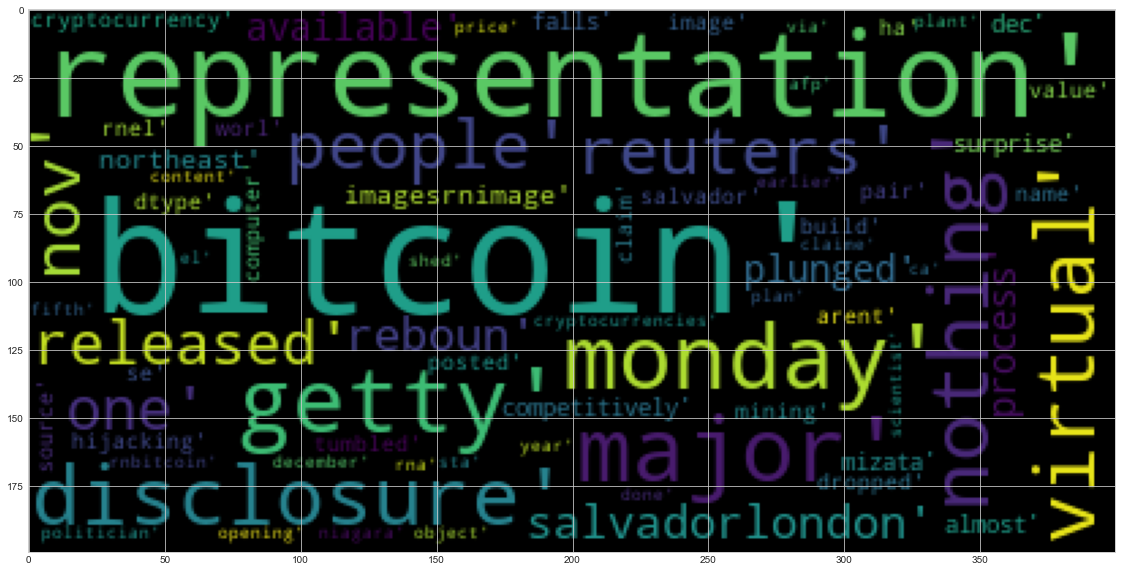

In [108]:
# Generate the Bitcoin word cloud
btc_news_text = str(btc_news_text)
btc_wc = WordCloud().generate(btc_news_text)
plt.imshow(btc_wc)

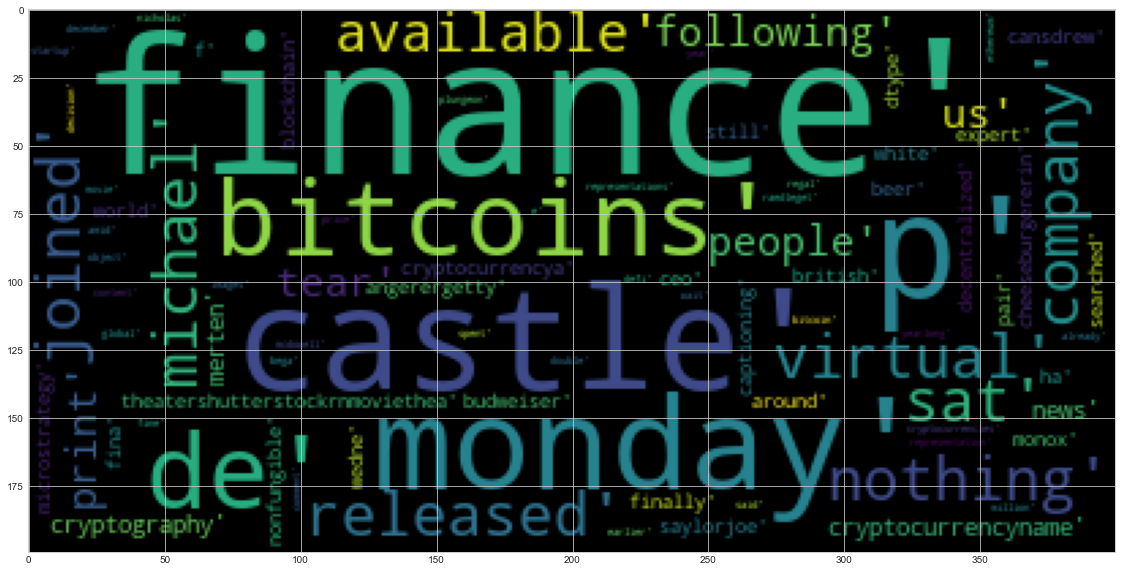

In [109]:
# Generate the Ethereum word cloud
eth_news_text = str(eth_news_text)
eth_wc = WordCloud().generate(eth_news_text)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [110]:
import spacy
from spacy import displacy

In [111]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [112]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [113]:
# Concatenate all of the Bitcoin text together


In [114]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc_text)

# Add a title to the document


In [115]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [116]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['Image', 'AFP', 'Niagara Falls', 'Earlier this year', 'MIZATA', 'El Salvador/', 'Reuters', 'first', '6     ', '99', 'December', '8     ', 'Reuters', 'Spotify', 'Reuters', '8.4%', '49', 'fifth', 'fifth', 'Reuters', '5.5%', '53', '14    ', '15    ', 'almost 5%', 'Monday', '16    ', 'Salvador', '17    ', '18    ']


---

### Ethereum NER

In [123]:
# Concatenate all of the Ethereum text together
print(eth_text)

0     More than $1.2 million has already been spent ...
1     Ethereum has been on a tear this year. Its out...
2     Blockchain startup MonoX Finance said on Wedne...
3     On Monday, Budweiser joined the non-fungible t...
4     Earlier this year, Nothing released a pair of ...
5     White Castle double cheeseburger.Erin McDowell...
6     Nicholas Merten , an expert in cryptography, p...
7     Regal movie theater.Shutterstock\r\nMovie-thea...
8     While people around the world still searched f...
9     The wait is finally over. After a year-long de...
10    MicroStrategy CEO Michael SaylorJoe Raedle/Get...
11    The Fine Print: The following comments are own...
12    Available for the same price, $99, on December...
13    Decentralized finance or DeFi is a global fina...
14    The U.S. Captioning Company and the British In...
15    Amid the news of Bitcoin's price plunge on Sat...
16    I own some cryptocurrencya decision which bega...
17    Representations of cryptocurrencies Bitcoi

In [125]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
# YOUR CODE HERE!

In [126]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [127]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['More than $1.2 million', 'Ethereum', 'this year', 'Wedne', 'Monday', 'Budweiser', 'Earlier this year', 'White Castle', 'Erin McDowell', '6', 'Nicholas Merten', 'Regal', '8     ', 'year-long de', 'MicroStrategy', 'Michael SaylorJoe Raedle/Get', '12    ', '99', 'December', 'DeFi', '14    ', 'The U.S. Captioning Company', 'British', 'Bitcoin', '16    ', '17    ', '18    ', 'Budweiser', 'Angerer/Getty']


---